In [1]:
import sys, os
import numpy as np
from pathlib import Path
import xarray as xr
import matplotlib.pylab as plt
import matplotlib.colors as mcolors

#from sklearn.metrics import r2_score
#sys.Path("../")
import settings as s



## jupyter nbconvert --to html overview_interpolation.ipynb --output "overview_interpolation_freeparameter_testarea31"


In [2]:
s.testarea = "testarea_31"
s.dataset = "ERA5"

In [3]:
s.input_dir = Path("/mnt/c/Users/Anna/Documents/UNI/PIK/develop/test_input") / s.dataset / s.testarea
s.output_dir = Path("/mnt/c/Users/Anna/Documents/UNI/PIK/develop/test_output_correlation") / s.testarea

In [6]:
## meteorological input file / factual dataset

infile_filepath = s.output_dir / "ERA5_tas12_ERA5_1950_2020_t_00010_basd_redim.nc"
infile_proc_filepath = s.output_dir / "ERA5_tas12_ERA5_1950_2020_t_00010_basd_redim_28.nc4"#"tas12_era5_1950_2020_00023_ba_preprocessed.nc4" 

infile_file = xr.open_dataset(infile_filepath)
infile_proc =  xr.load_dataset(infile_proc_filepath)

## masks
bmask_filepath = s.output_dir / "b_mask_31.nc"
bmask = xr.load_dataset(bmask_filepath)

lsmask = xr.load_dataset( s.output_dir / "landmask_00010.nc")

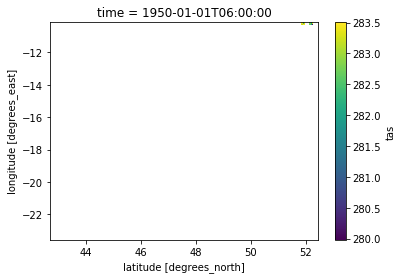

In [ ]:
#sum(infile_file["tas"][16,:,:]==np.nan)#.plot()
infile_file.tas#[0,100:,:-10].plot()
#lsmask.area_European_01min[:,:].plot()

In [13]:
## Parameter files
parameter_filepath = s.output_dir / "tas_parameters_31.nc4"
params_filepath_masked = s.output_dir /"tas_parameters_31_m_tmp_nan_tmp.nc4" 
parameter_filepath_interp = s.output_dir / "tas_parameters_31_m_tmp_nan_tmp_g_tmp.nc4"
params_filepath_n4 = s.output_dir / "tas_parameters_interpolated_31.nc4"

parameter_file = xr.load_dataset(parameter_filepath)
parameter_file_masked = xr.load_dataset(params_filepath_masked)
parameter_file_interp = xr.load_dataset(parameter_filepath_interp)
parameter_file_n4 = xr.load_dataset(params_filepath_n4)


## cfact files
original_cfact_filepath = "/mnt/c/Users/Anna/Documents/UNI/PIK/test_input/test_output/local_run_sub40/cfact/tas/cfact_sub40_tst_09.nc4" # with my pp.rescale()
#original_cfact_filepath = "/mnt/c/Users/Anna/Documents/UNI/PIK/test_input/test_output/local_run_sub40/cfact/tas/tas_GSWP3-W5E5_cfactual_sub40.nc4"  # with master-branch pp.globla code
# #tas_cfactual_original.nc4" # master-branch, 
#original_cfact_filepath = s.output_dir / "cfact/tas/tas_cfactual_originalByParameters.nc4" #by parameter file 
interpolated_cfact_filepath = s.output_dir / "cfact/tas/tas_cfactual_interpolated.nc4"

original_cfact = xr.load_dataset(original_cfact_filepath)
interpolated_cfact = xr.load_dataset(interpolated_cfact_filepath)


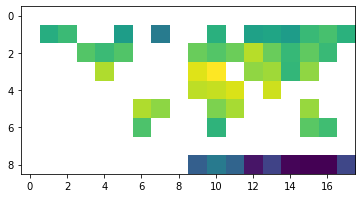

In [12]:
## org pp. code for merge_cfact
original_cfact.cfact[25000,:,:].plot()
#plt.imshow(original_cfact.cfact[25000,:,:])#.plot()

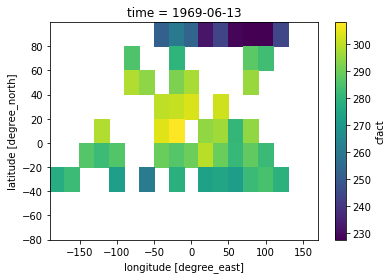

In [15]:
## pp.rescale()

original_cfact.cfact[25000,:,:].plot()
#plt.imshow(original_cfact.cfact[25000,:,:])#.plot()

In [ ]:
# calc Kelvin -> celsius

infile_file = infile_file.apply( lambda x: x - 273.15, keep_attrs=True) 
infile_proc = infile_proc.apply( lambda x: x - 273.15, keep_attrs=True) 

original_cfact = original_cfact.apply( lambda x: x - 273.15, keep_attrs=True) 
interpolated_cfact = interpolated_cfact.apply( lambda x: x - 273.15, keep_attrs=True) 



#### Plot cfact ~ fact, interpolated cfact ~ fact , cfact ~ interpolated cfact
last timesteps and mean for last year in timeline:

	panel a) Counterfactual - Factual
	panel b) Interpolated Counterfactual - Factual
	panel c) Counterfactual - Interpolated Counterfactual



In [ ]:
fact_lastyear = infile_proc.tas.sel(time=infile_proc.time.dt.year==2020)
original_cfact_lastyear = original_cfact.cfact.sel(time=original_cfact.time.dt.year==2020)
interpolated_cfact_lastyear = interpolated_cfact.cfact.sel(time=interpolated_cfact.time.dt.year==2020)


In [ ]:
## current workaround to fix flip of lat in cfacts
#interpolated_cfact
#original_cfact_lastyear

original_cfact_lastyear = np.array(original_cfact_lastyear)
interpolated_cfact_lastyear = np.array(interpolated_cfact_lastyear.reindex(lat=interpolated_cfact_lastyear.lat[::-1]))


In [ ]:
 # fix improper latitudes between files

fact_cfact = fact_lastyear - original_cfact_lastyear
fact_icfact = fact_lastyear - interpolated_cfact_lastyear#[:, ::-1, :]
cfact_icfact = xr.DataArray(original_cfact_lastyear - interpolated_cfact_lastyear)

*last timestamp= 31.12.2020:*


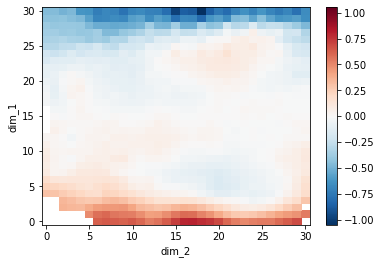

In [ ]:
#t = np.array(interpolated_cfact.cfact.reindex(lat=interpolated_cfact.lat[::-1]))
#t[0,:,:].plot()
#xr.DataArray(cfact_icfact)[0, :, :]
#plt.imshow(fact_icfact[0,:,:])
#plt.imshow(cfact_icfact[0, :, :])

#original_cfact.cfact[360,:,:].plot()

#original_cfact_lastyear
cfact_icfact[360, :, :].plot()

##fact_lastyear[0,:,:].plot()
#xr.DataArray(cfact_icfact)[365,:,:].plot()
#interpolated_cfact.cfact[25000,:,:].plot()
#t = interpolated_cfact.cfact.transpose("time", "lat", "lon", transpose_coords=False)
#t= t.sel(lat=slice(None, None, -1))
#t
#.reindex(lat=list(reversed(interpolated_cfact.lat)))#
#xr.DataArray(fact_cfact)
#original_cfact.cfact[0,:,:].plot()
#interpolated_cfact.cfact[0,:,:].plot()

#plt.imshow(interpolated_cfact_lastyear[0, ::-1, :])
# plt.colorbar()

Text(0.5, 1.0, 'cfact - interpolated cfact [°C], \ntimestep= 365')

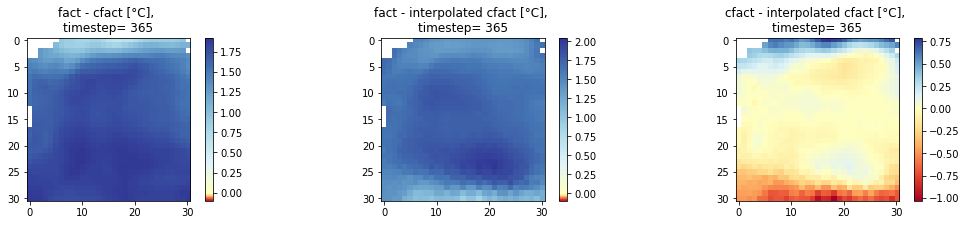

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize = (18, 3), ncols = 3)
timestep = 365

norm = mcolors.DivergingNorm(vmin=-0.1, vmax=np.max(fact_cfact[timestep,  :, :]), vcenter=0.0) # aligne around 0
f_c = ax1.imshow(fact_cfact[timestep,  :, :], cmap="RdYlBu", norm=norm) #, vmin=value_min, vmax=value_max) 
fig.colorbar(f_c, ax = ax1)
ax1.set_title(f"fact - cfact [°C], \ntimestep= {timestep}")

norm = mcolors.DivergingNorm(vmin=-0.1, vmax=np.max(fact_icfact[timestep,  :, :]), vcenter=0.0) # aligne around 0
f_ic = ax2.imshow(fact_icfact[timestep,  :, :], cmap="RdYlBu", norm=norm)#, vmin= value_min, vmax=value_max) 
fig.colorbar(f_ic, ax = ax2)
ax2.set_title(f"fact - interpolated cfact [°C], \ntimestep= {timestep}")

norm = mcolors.DivergingNorm(vmin=np.min(cfact_icfact[timestep,  :, :]), vmax=np.max(cfact_icfact[timestep,  :, :]), vcenter=0.0) # aligne around 0
c_ic = ax3.imshow(cfact_icfact[timestep,  :, :], cmap="RdYlBu", norm=norm) 
fig.colorbar(c_ic, ax = ax3)
ax3.set_title(f"cfact - interpolated cfact [°C], \ntimestep= {timestep}")


*mean of last year*


In [ ]:
fact_cfact_mean = fact_cfact.stack(coords=['lat','lon'])
fact_icfact_mean = fact_icfact.stack(coords=['lat','lon'])
cfact_icfact_mean = cfact_icfact.stack(coords=['dim_1','dim_2'])

fact_cfact_mean = fact_cfact_mean.groupby("coords").apply( lambda x: np.mean(x) ).unstack('coords')
fact_icfact_mean = fact_icfact_mean.groupby("coords").apply( lambda x: np.mean(x) ).unstack('coords')
cfact_icfact_mean = cfact_icfact_mean.groupby("coords").apply( lambda x: np.mean(x) ).unstack('coords')

/root/anaconda3/envs/attrici_yml/lib/python3.7/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


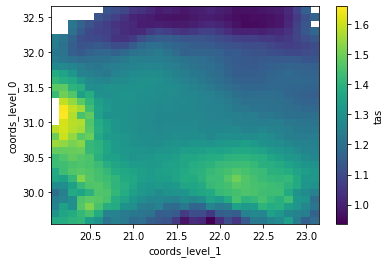

In [ ]:
fact_icfact_mean[:,:].plot()

Text(0.5, 1.0, 'cfact - interpolated cfact [°C], ')

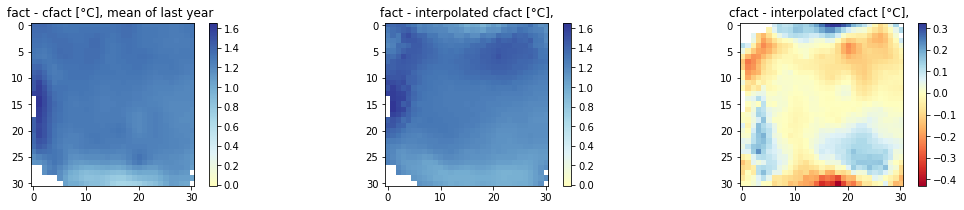

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize = (18, 3), ncols = 3)

norm = mcolors.DivergingNorm(vmin=-0.01, vmax=np.max(fact_cfact_mean[  :, :]), vcenter=0.0) # aligne around 0
f_c = ax1.imshow(fact_cfact_mean[ :, :], cmap="RdYlBu", norm=norm) #, vmin=value_min, vmax=value_max) 
fig.colorbar(f_c, ax = ax1)
ax1.set_title(f"fact - cfact [°C], mean of last year ")

norm = mcolors.DivergingNorm(vmin=-0.01, vmax=np.max(fact_icfact_mean[  :, :]), vcenter=0.0) 
f_ic = ax2.imshow(fact_icfact_mean[ :, :], cmap="RdYlBu", norm=norm)#, vmin= value_min, vmax=value_max) 
fig.colorbar(f_ic, ax = ax2)
ax2.set_title(f"fact - interpolated cfact [°C],")

norm = mcolors.DivergingNorm(vmin=np.min(cfact_icfact_mean[ :, :]), vmax=np.max(cfact_icfact_mean[ :, :]), vcenter=0.0)
c_ic = ax3.imshow(cfact_icfact_mean[ :, :], cmap="RdYlBu", norm=norm) 
fig.colorbar(c_ic, ax = ax3)
ax3.set_title(f"cfact - interpolated cfact [°C], ")


#### Plot original and interpolated cfact files, entire timespane

*for one timestep*:

Text(0.5, 1.0, 'original - interpolated cfact file [°C], \ntimestep= 25932')

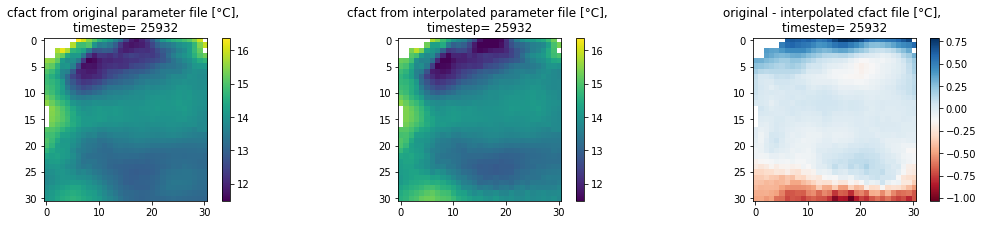

In [ ]:
timestep = 25932

fig, (ax1, ax2, ax3) = plt.subplots(figsize = (18, 3), ncols = 3)

value_min = np.min(original_cfact["cfact"][timestep,  :, :])
value_max = np.max(original_cfact["cfact"][timestep,  :, :])

org = ax1.imshow(original_cfact["cfact"][timestep,  :, :], vmin=value_min, vmax=value_max) 
fig.colorbar(org, ax = ax1)
ax1.set_title(f"cfact from original parameter file [°C], \ntimestep= {timestep}")

cfct = ax2.imshow(interpolated_cfact["cfact"][timestep,  ::-1, :], vmin= value_min, vmax=value_max) 
fig.colorbar(cfct, ax = ax2)
ax2.set_title(f"cfact from interpolated parameter file [°C], \ntimestep= {timestep}")


## Bias
bias_cfact = original_cfact - interpolated_cfact
value_min = np.min(bias_cfact["cfact"][timestep,  :, :])
value_max = np.max(bias_cfact["cfact"][timestep,  :, :])

#norm = mcolors.DivergingNorm(vmin=value_min, vmax=value_max, vcenter=0.0) # aligne around 0
bias = ax3.imshow(bias_cfact["cfact"][timestep,  :, :], cmap="RdBu")#, norm=norm) 
fig.colorbar(bias, ax=ax3, cmap="RdBu")#, extend='both')
ax3.set_title(f"original - interpolated cfact file [°C], \ntimestep= {timestep}")



### Plot mean over time dim and absolute error over time

*for entire timespane:*

In [ ]:
## average over timesteps
# Source: https://stackoverflow.com/questions/52453426/grouping-by-multiple-dimensions
# stack lat and lon into a single dimension, apply mean over timesteps and unstack to lat lon again
original_cfact_mean = original_cfact.stack(coords=['lat','lon'])
original_cfact_mean = original_cfact_mean.groupby("coords").apply( lambda x: np.mean(x) )
original_cfact_mean = original_cfact_mean.unstack('coords')

interpolated_cfact_mean = interpolated_cfact.stack(coords=['lat','lon'])
interpolated_cfact_mean = interpolated_cfact_mean.groupby("coords").apply( lambda x: np.mean(x) )
interpolated_cfact_mean = interpolated_cfact_mean.unstack('coords')


## mean abs bias 
abs_cfact = abs(original_cfact["cfact"][:,:,:] - interpolated_cfact["cfact"][:,:,:])  

abs_cfact_mean = abs_cfact.stack(coords=['lat','lon'])
abs_cfact_mean = abs_cfact_mean.groupby("coords").apply( lambda x: np.mean(x) )
abs_cfact_mean = abs_cfact_mean.unstack('coords')

## maximum for interp+original cfact over time dim
original_cfact_max = original_cfact.stack(coords=['lat','lon'])
original_cfact_max = original_cfact_max.groupby("coords").apply( lambda x: np.max(x) )
original_cfact_max = original_cfact_max.unstack('coords')

interpolated_cfact_max = interpolated_cfact.stack(coords=['lat','lon'])
interpolated_cfact_max = interpolated_cfact_max.groupby("coords").apply( lambda x: np.max(x) )
interpolated_cfact_max = interpolated_cfact_max.unstack('coords')

## maximum absoulte bias
abs_cfact = abs(original_cfact["cfact"][:,:,:] - interpolated_cfact["cfact"][:,:,:])  

abs_cfact_max = abs_cfact.stack(coords=['lat','lon'])
abs_cfact_max = abs_cfact_max.groupby("coords").apply( lambda x: np.max(x) )
abs_cfact_max = abs_cfact_max.unstack('coords')


/root/anaconda3/envs/attrici_yml/lib/python3.7/site-packages/xarray/core/nputils.py:220: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


Text(0.5, 1.0, 'mean of absolute bias over time [°C]')

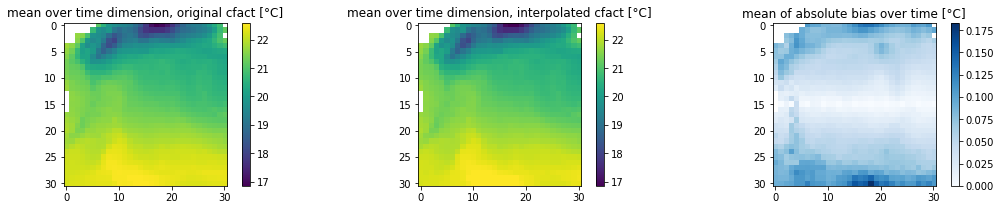

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize = (18, 3), ncols = 3)


value_min = np.min(original_cfact_mean.variables["cfact"][ :, :])
value_max = np.max(original_cfact_mean.variables["cfact"][ :, :])

## mean over time dim
org = ax1.imshow(original_cfact_mean.variables["cfact"][ :, :], vmin=value_min, vmax=value_max) 
fig.colorbar(org, ax = ax1)
ax1.set_title("mean over time dimension, original cfact [°C]")

cfct = ax2.imshow(interpolated_cfact_mean.variables["cfact"][ :, :], vmin= value_min, vmax=value_max) 
fig.colorbar(cfct, ax = ax2)
ax2.set_title("mean over time dimension, interpolated cfact [°C]")


##  Absoulte Bias
bias = ax3.imshow(abs_cfact_mean.variable[ :, :], cmap="Blues")#,  vmin=value, vmax=value) 
fig.colorbar(bias)#, ax=ax3, cmap="RdBu", extend='both')
ax3.set_title("mean of absolute bias over time [°C]")


Text(0.5, 1.0, 'maximum of absolute bias over time [°C]')

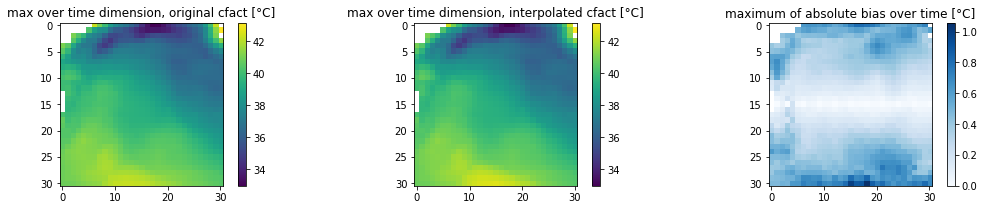

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize = (18, 3), ncols = 3)

## max over time dim
value_min = np.min(original_cfact_max.variables["cfact"][ :, :])
value_max = np.max(original_cfact_max.variables["cfact"][ :, :])

org = ax1.imshow(original_cfact_max.variables["cfact"][ :, :], vmin=value_min, vmax=value_max) 
fig.colorbar(org, ax = ax1)
ax1.set_title("max over time dimension, original cfact [°C]")

cfct = ax2.imshow(interpolated_cfact_max.variables["cfact"][ :, :], vmin= value_min, vmax=value_max) 
fig.colorbar(cfct, ax = ax2)
ax2.set_title("max over time dimension, interpolated cfact [°C]")

##  Absoulte Bias
bias = ax3.imshow(abs_cfact_max.variable[ :, :], cmap="Blues")#,  vmin=value, vmax=value) 
fig.colorbar(bias)#, ax=ax3, cmap="RdBu", extend='both')
ax3.set_title("maximum of absolute bias over time [°C]")

## max 0.4 also for cfact from org. attrici code + for cfact from freeparams.file

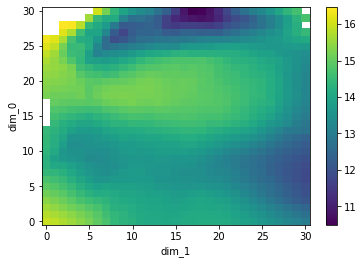

In [ ]:
xr.DataArray(np.array(original_cfact.cfact)[0,::-1,:]).plot()

#### quantifiy bias between interpolated and original cfact

In [ ]:
rmse_cfact = np.sqrt(((original_cfact - interpolated_cfact) ** 2).mean())["cfact"].values
rmse_fact_cfact = np.sqrt(((infile_proc.tas - original_cfact.cfact) ** 2).mean()).values 
rmse_fact_icfact = np.sqrt(((infile_proc.tas - interpolated_cfact.cfact) ** 2).mean()).values


In [ ]:
print(f"RMSE between both counterfacutal temperature [°C]: {rmse_cfact}")
print(f"RMSE between factual temperature and original counterfactual temperature[°C]: {rmse_fact_cfact}")
print(f"RMSE between factual temperature and interpolated counterfactual temperature[°C]: {rmse_fact_icfact}")


RMSE between both counterfacutal temperature [°C]: 0.09223220497369766
RMSE between factual temperature and original counterfactual temperature[°C]: 2.543888568878174
RMSE between factual temperature and interpolated counterfactual temperature[°C]: 2.5360987186431885


/root/anaconda3/envs/attrici_yml/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/root/anaconda3/envs/attrici_yml/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


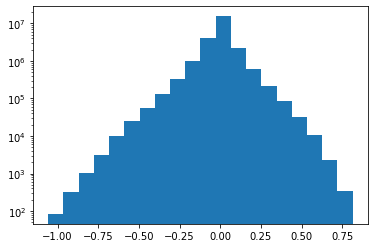

In [ ]:
## Bias distribution (y-axis log scaled)

bias_distribution = np.array(bias_cfact["cfact"][:, :, :]).flatten()

plt.hist(bias_distribution, bins=20, log=True)
plt.show()

###  Plot interpolated and original parameter files 

Text(0.5, 1.0, 'IDW n=4, interpolated parameter file')

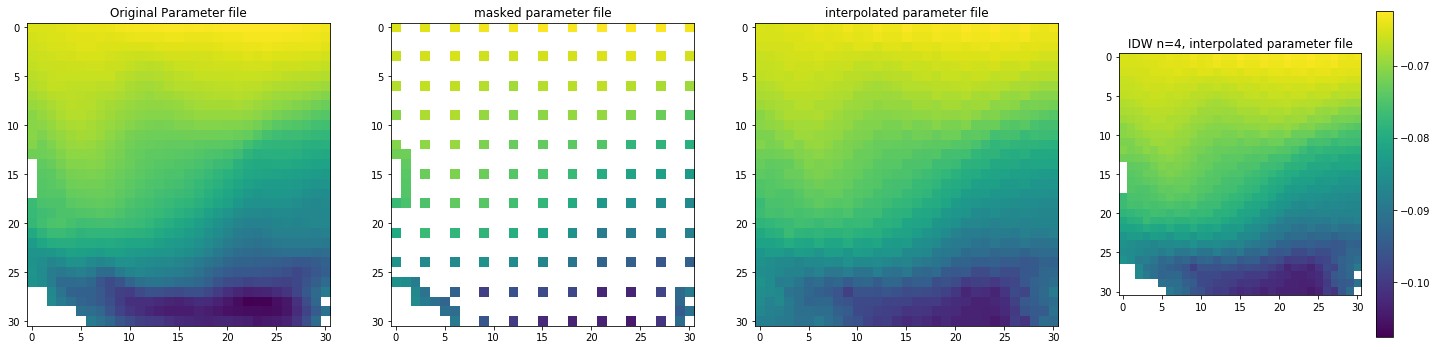

In [ ]:
#param_name = "weights_longterm_trend"  
param_name = "weights_fc_intercept_2"      
#param_name = "weights_sigma_fc_intercept_0" 
layer = 0

fig, (ax1, ax2, ax3, ax4) = plt.subplots(figsize = (25, 6), ncols=4)

value_min = np.min(parameter_file.variables[param_name][layer,  :, :])
value_max = np.max(parameter_file.variables[param_name][layer,  :, :])


# org
org = ax1.imshow(parameter_file.variables[param_name][ layer,  :, :],  vmin=value_min, vmax=value_max)  
ax1.set_title("Original Parameter file")

# masked
org_masked = ax2.imshow(parameter_file_masked.variables[param_name][ layer,  :, :],  vmin=value_min, vmax=value_max)  
ax2.set_title("masked parameter file")

# interpolated
interp = ax3.imshow(parameter_file_interp.variables[param_name][ layer,  :, :],  vmin=value_min, vmax=value_max)  
ax3.set_title("interpolated parameter file")

## n=4
idw_n4 = ax4.imshow(parameter_file_n4.variables[param_name][ layer,  :, :], vmin=value_min, vmax=value_max)
fig.colorbar(org, ax = ax4)
ax4.set_title("IDW n=4, interpolated parameter file")



###  Plot meteorological files which are used as input for parameter file

In [ ]:
## mean for input file over time dim
## flipped bc mena+max images are upside down
infile_proc_mean = infile_proc.stack(coords=['lat','lon'])
infile_proc_mean = infile_proc_mean.groupby("coords").apply( lambda x: np.mean(x) )
infile_proc_mean = infile_proc_mean.unstack('coords')

## maximum for input file over time dim
infile_proc_max = infile_proc.stack(coords=['lat','lon'])
infile_proc_max = infile_proc_max.groupby("coords").apply( lambda x: np.max(x) )
infile_proc_max = infile_proc_max.unstack('coords')


In [ ]:
infile_proc_max["tas"][:,:].max()

<xarray.DataArray 'tas' ()>
array(43.183655, dtype=float32)

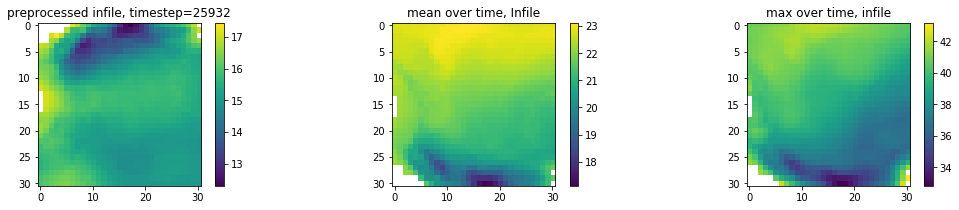

In [ ]:
param_name = "tas"
layer = 25932

fig, (ax1, ax2, ax3) = plt.subplots(figsize = (18, 3), ncols = 3)

value_min = np.min(infile_proc.variables[param_name][layer,  :, :])
value_max = np.max(infile_proc.variables[param_name][layer,  :, :])


# org
org = ax1.imshow(infile_proc.variables[param_name][ layer,  :, :],  vmin=value_min, vmax=value_max)  
ax1.set_title(f"preprocessed infile, timestep={layer}")
fig.colorbar(org, ax = ax1)


infile_mean = ax2.imshow(infile_proc_mean.variables[param_name][  :, :])#,  vmin=value_min, vmax=value_max)  
ax2.set_title("mean over time, Infile")
fig.colorbar(infile_mean, ax = ax2)

# max
infile_max = ax3.imshow(infile_proc_max.variables[param_name][  :, :])#,  vmin=value_min, vmax=value_max)  
ax3.set_title("max over time, infile")
fig.colorbar(infile_max, ax = ax3)
